#  Computación Científica Avanzada | Map, reduce, filter, etc.

En la sesión 2 se han tratado los conceptos básicos de las librerías numpy y pandas. En caso de buscar mayor detalle en el análisis de datos con Python se ha desarrollado el siguiente Jupyter Notebook.

In [1]:
import pandas as pd
import numpy as np
import math

### Lambda

La función `lambda` es una función que tan solo tiene una expresión, su principal uso es para mantener el código más limpio. 

A continuación se crean dos funciones para sumar dos valores, de la forma más general y con el uso de `lambda`

In [2]:
def add(x,y):
    return x + y

add(2,3)

5

In [3]:
add = lambda x, y: x + y
add(2,3)

5

### Map

La función `map` ejecuta la función a la que hace referencia como primer argumento tantas veces como valores tenga el iterable

 - map(function, iterable, ...)

In [4]:
def operation_square(number):
    return number**2

numbers = [1,2,3,6,7,8]

squared = map(operation_square, numbers)
list(squared)

[1, 4, 9, 36, 49, 64]

También se puede utilizar con `strings` 

In [5]:
with_spaces = ["processing", "strings", "with", "map"]

list(map(str.upper, with_spaces))

['PROCESSING', 'STRINGS', 'WITH', 'MAP']

Y procesar entrada multiple con funciones que tomen más de un parámetro, como es el caso de `pow`:

In [6]:
pow(2,3)

8

In [7]:
list(map(pow, [1, 2, 3], [4, 5, 6, 7]))

[1, 32, 729]

Es muy usual ver las funciones **map y lambda** utilizarse conjuntamente. De esta forma se entenderá mejor la motivación de usar `lambda`

In [8]:
numbers=[1,2,3,6,7,8]

squared = map(lambda num: num ** 2, numbers)
list(squared)

[1, 4, 9, 36, 49, 64]

In [9]:
list(map(lambda x, y: x - y, [2, 5, 6], [1, 3, 5]))

[1, 2, 1]

In [10]:
list(map(lambda c: 9/5*c+32, [100,40,80])) #To_Fahrenheit
list(map(lambda f: (f-32)*5/9, [212,104,176])) #To_Celsius

[100.0, 40.0, 80.0]

### Filter

La función `filter` filtrará los elementos sobre los que va a iterar usando una función que proporcionemos.
 - filter(function,iterable)

In [11]:
matematicos = ["Gaulois", "Euler", "Lindelof", "Rolle", "Weierstrass", "Riemann", "Gauss"]
filter_object = list(filter(lambda s: s[0] == "G", matematicos))
filter_object

['Gaulois', 'Gauss']

In [12]:
notas = [66, 90, 68, 59, 76, 60, 88, 74, 81, 65]
notables = list(filter(lambda x: x>70, notas))
notables

[90, 76, 88, 74, 81]

In [13]:
numeros = np.array([25, 9, 81, -16, 0, -12])
menores_cero = list(filter(lambda x: x >= 0, numeros))
print(menores_cero)

[25, 9, 81, 0]


De nuevo es muy usual ver estas funciones usarse de forma conjunta, este es el caso de **map, filter y lambda** al mismo tiempo. 

En la siguiente celda se llama a la función `map` en la que se hace la raíz cuadrada sobre los elementos iterables, estos elementos surgen de filtrar la lista numeros.

In [14]:
output = list(map(math.sqrt, filter(lambda x: x>=0, numeros)))
output

[5.0, 3.0, 9.0, 0.0]

### Reduce

In [15]:
from functools import reduce

La función `reduce` se utilizar para ejecutar una función sobre los argumentos de la lista. Este caso es un poco más complejo, se detalla como es el proceso:
1. Se toman los primeros dos elementos y se ejecuta la función con ellos guardando un resultado.
2. Se ejecuta la función con el resultado anterior y el siguiente valor (el tercero)
3. Se ejecuta la función con el resultaod anterior y el siguiente valor (el cuarto)
4. El proceso continua hasta no haber más elementos, el resultado final es el último.

In [16]:
numeros = [2, 4, 7, 3]
reduce(lambda x, y: x + y, numeros)

16

Reduce acepta un valor inicial, la única diferencia si lo hubiéramos dado habría sido un paso adicional donde `reduce()` comenzaría con el valor inicial y después consideraría el primero de la lista y continuaría igual.

In [17]:
reduce(lambda x, y: x + y, numeros, 10)

26

Resumimos las cuatro funciones aprendidas:

In [18]:
lista_floats = [4.35, 6.09, 3.25, 9.77, 2.16, 8.88, 4.59]
lista_nombres = ["Gaulois", "Euler", "Lindelof", "Rolle", "Weierstrass", "Riemann", "Gauss"]
lista_enteros = [4, 6, 9, 23, 5]

map_result = list(map(lambda x: round(x ** 2, 3), lista_floats))
filter_result = list(filter(lambda name: len(name) <= 7, lista_nombres))
reduce_result = reduce(lambda num1, num2: num1 * num2, lista_enteros)

print(map_result)
print(filter_result)
print(reduce_result)

[18.922, 37.088, 10.562, 95.453, 4.666, 78.854, 21.068]
['Gaulois', 'Euler', 'Rolle', 'Riemann', 'Gauss']
24840


### Starmap

In [19]:
from itertools import starmap

Se basa en una idea similar a la función `map`. El utilizar una u otra vendrá motivado por el tipo de variables de entrada que tengamos, si se trata de una lista de tuplas utilizaremos `starmap`.

In [20]:
values=[(2,4),(3,5),(2,3),(3,3)]

list(starmap(lambda x,y: pow(x,y), values))

[16, 243, 8, 27]

Si no tenemos tuplas utilizamos `map`

In [21]:
base=[2,3]
exponent=[4,5]

list(map(lambda x,y: pow(x,y), base, exponent))

[16, 243]

Utilizamos `starmap` con tres variables de entrada, utilizando el Teorema de Pitágoras hallamos cuales de los triangulos son rectangulos.

In [22]:
lados_triangulo =[(2, 3, 4),  
                  (3, 4, 5), 
                  (6, 8, 10), 
                  (1, 5, 7), 
                  (7, 4, 10)] 

triangulo_rectangulo = list(starmap(lambda x, y, z: True if ((x * x)+(y * y))==(z * z) else False, lados_triangulo)) 
  
print("Las tuplas representan un triangulo rectangulo :", triangulo_rectangulo, end ="\n") 
print("Las coordenadas de los triangulos rectangulos son :", end ="") 

for i in range (0, len(triangulo_rectangulo)): 
    if triangulo_rectangulo[i]== True: 
        print(lados_triangulo[i], end =" ")

Las tuplas representan un triangulo rectangulo : [False, True, True, False, False]
Las coordenadas de los triangulos rectangulos son :(3, 4, 5) (6, 8, 10) 

### Apply
La función `apply()` se utiliza para ejecutar una función a lo largo de las filas/columnas de un DataFrame.

In [4]:
df = pd.DataFrame({'pares':[0,2,4,6,8,10], 
                   'impares':[1,3,5,7,9,11], 
                   'perfectos': [1,2,3,6,28,496], 
                   'fibonacci':[0,1,1,2,3,5]})
df.apply(lambda x: x+1)

,pares,impares,perfectos,fibonacci
0,1,2,2,1
1,3,4,3,2
2,5,6,4,2
3,7,8,7,3
4,9,10,29,4
5,11,12,497,6


El parametro axis denota si la función se ejecuta para cada columna (0) o fila (1).

In [24]:
df.apply(np.sum, axis=0)

pares         30
impares       36
perfectos    536
fibonacci     12
dtype: int64

In [25]:
df.apply(np.sum, axis=1)

0      2
1      8
2     13
3     21
4     48
5    522
dtype: int64

Si queremos aplicar una función a todos los valores del `DataFrame` utilizamos la función `applymap`

In [6]:
df.applymap(np.sqrt)

,pares,impares,perfectos,fibonacci
0,0.000000,1.000000,1.000000,0.000000
1,1.414214,1.732051,1.414214,1.000000
2,2.000000,2.236068,1.732051,1.000000
3,2.449490,2.645751,2.449490,1.414214
4,2.828427,3.000000,5.291503,1.732051
5,3.162278,3.316625,22.271057,2.236068


La diferencia entre `map`, `applymap` y `apply`

## Data frame

Utilizamos las funciones aprendidas para manipular `DataFrame`

In [2]:
df=pd.DataFrame({'id':[1,2,3,4,5,6,7,8],
                 'nombre':['Asensi','Claus','Marina','Juan','Roson','Mariauri', 'Guijo', 'Alex'],
                 'edad': [19,21,24,16,20,17,20,14],
                 'origen':['AS-OVI', 'AS-CAN', 'GA-CAR', 'AS-OVI', 'AS-OVI', 'LE-PON', 'AS-CAN', 'AS-OVI'],
                 'puntos':[2000,2500,2750,1800,5100,1700,4100,3400]})

df=df.set_index('id')
df

,nombre,edad,origen,puntos
id,,,,
1,Asensi,19,AS-OVI,2000
2,Claus,21,AS-CAN,2500
3,Marina,24,GA-CAR,2750
4,Juan,16,AS-OVI,1800
5,Roson,20,AS-OVI,5100
6,Mariauri,17,LE-PON,1700
7,Guijo,20,AS-CAN,4100
8,Alex,14,AS-OVI,3400


Aumentamos en 20% los puntos de todas las personas. Se puede hacer con `apply` o `map`:

In [8]:
df['puntos']=df['puntos'].apply(lambda x: int(x+x*0.2))
df

#df['puntos']=list(map(lambda x: int(x+x*0.2), df['puntos']))

,nombre,edad,origen,puntos
id,,,,
1,Asensi,19,AS-OVI,2400
2,Claus,21,AS-CAN,3000
3,Marina,24,GA-CAR,3300
4,Juan,16,AS-OVI,2160
5,Roson,20,AS-OVI,6120
6,Mariauri,17,LE-PON,2040
7,Guijo,20,AS-CAN,4920
8,Alex,14,AS-OVI,4080


Utilizamos la función `apply` sobre `Strings`

In [9]:
df['origen']=df['origen'].apply(lambda x:x.split("-")[0])
df

,nombre,edad,origen,puntos
id,,,,
1,Asensi,19,AS,2400
2,Claus,21,AS,3000
3,Marina,24,GA,3300
4,Juan,16,AS,2160
5,Roson,20,AS,6120
6,Mariauri,17,LE,2040
7,Guijo,20,AS,4920
8,Alex,14,AS,4080


Filtramos las edades que superan los 18 años y añadimos una columna con variables booleanos.

In [10]:
list(filter(lambda x: x>=18, df['edad']))

[19, 21, 24, 20, 20]

In [11]:
df['mayor_edad']=df['edad']>=18
df

,nombre,edad,origen,puntos,mayor_edad
id,,,,,
1,Asensi,19,AS,2400,True
2,Claus,21,AS,3000,True
3,Marina,24,GA,3300,True
4,Juan,16,AS,2160,False
5,Roson,20,AS,6120,True
6,Mariauri,17,LE,2040,False
7,Guijo,20,AS,4920,True
8,Alex,14,AS,4080,False


### Assign

In [31]:
df.assign(aleatorio = lambda x: 3, 
          porcentaje = lambda x: df['puntos']/sum(df['puntos'])*100) 

,nombre,edad,origen,puntos,mayor_edad,aleatorio,porcentaje
id,,,,,,,
1,Asensi,19,AS,2400,True,3,8.565310
2,Claus,21,AS,3000,True,3,10.706638
3,Marina,24,GA,3300,True,3,11.777302
4,Juan,16,AS,2160,False,3,7.708779
5,Roson,20,AS,6120,True,3,21.841542
6,Mariauri,17,LE,2040,False,3,7.280514
7,Guijo,20,AS,4920,True,3,17.558887
8,Alex,14,AS,4080,False,3,14.561028


### Merge

In [34]:
df2=pd.DataFrame({'nombre':['Asensi','Claus','Marina','Juan','Roson','Mariauri', 'Guijo', 'Alex'],
                 'teverga': [0,0,2,2,3,0,3,10],
                 'mugrientos':[False, False, True, True, True, False, False, False]})
df2

,nombre,teverga,mugrientos
0,Asensi,0,False
1,Claus,0,False
2,Marina,2,True
3,Juan,2,True
4,Roson,3,True
5,Mariauri,0,False
6,Guijo,3,False
7,Alex,10,False


In [36]:
df.merge(df2, on='nombre', how='left')

,nombre,edad,origen,puntos,mayor_edad,teverga,mugrientos
0,Asensi,19,AS,2400,True,0,False
1,Claus,21,AS,3000,True,0,False
2,Marina,24,GA,3300,True,2,True
3,Juan,16,AS,2160,False,2,True
4,Roson,20,AS,6120,True,3,True
5,Mariauri,17,LE,2040,False,0,False
6,Guijo,20,AS,4920,True,3,False
7,Alex,14,AS,4080,False,10,False


La suma de todos los puntos:

In [30]:
reduce(lambda a,b: a+b,df['puntos'])

28020

In [50]:
df.groupby('origen').groups.keys()

dict_keys(['AS-CAN', 'AS-OVI', 'GA-CAR', 'LE-PON'])

In [51]:
df.groupby(['origen','mayor_edad'])['puntos'].sum()

origen  mayor_edad
AS-CAN  True          7920
AS-OVI  False         6240
        True          8520
GA-CAR  True          3300
LE-PON  False         2040
Name: puntos, dtype: int64

## Películas | DataFrame
Vamos a trabajar lo estudiado con un DataFrame de mayores dimensiones, en este caso las películas de la plataforma Netflix.

Descargar los datos en [Kaggle](https://www.kaggle.com/shivamb/netflix-shows/download) se requiere registrarse, es muy interesante y cuenta con infinidad de datasets y scripts en multiples lenguajes, muy recomendable para profundizar.

https://www.kaggle.com/dmitryuarov/netflix-eda-with-plotly
https://www.kaggle.com/jardelbaiajr/data-visualization-netflix

In [61]:
peliculas = pd.read_csv("peliculas.csv")
peliculas

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


Analizamos la cantidad de NA/NaN que tenemos en el `DataFrame`:

In [62]:
peliculas.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

A partir de la fecha creamos dos columnas nuevas de año y mes. Para ello tenemos que 

In [64]:
peliculas['date_added'] = peliculas['date_added'].fillna('no data')

peliculas['year_added'] = peliculas['date_added'].apply(lambda x: x[-4:len(x)])
peliculas['month_added'] = peliculas['date_added'].apply(lambda x: x.split(' ')[0])
peliculas.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December


Analizamos que valores de rating son NaN, para ello utilizamos `query` que nos devuelve el `DataFrame` filtrado en base a una expresión.

In [67]:
peliculas.query('rating != rating') 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...,2017,January
2359,s2360,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel...",2016,December
3660,s3661,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take...",2018,February
3736,s3737,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017,April
3737,s3738,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016,September
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...,2016,August
4323,s4324,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c...",2017,March


In [77]:
peliculas.iloc[67, 8] = 'NoData' 
peliculas.iloc[2359, 8] = 'NoData'
peliculas.iloc[3660, 8] = 'NoData'
peliculas.iloc[3736, 8] = 'NoData'
peliculas.iloc[3737, 8] = 'NoData'
peliculas.iloc[3738, 8] = 'NoData'
peliculas.iloc[4323, 8] = 'NoData'

peliculas['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'NoData', 'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'],
      dtype=object)

### Creamos una columna para el publico recomendado en funcion del rating

In [83]:
peliculas['age_group'] = peliculas['rating']
publico = {'TV-MA': 'Adults',
          'R': 'Adults',
          'PG-13': 'Teens',
          'TV-14': 'Young Adults',
          'TV-PG': 'Older Kids',
          'NR': 'Adults',
          'TV-G': 'Kids',
          'TV-Y': 'Kids',
          'TV-Y7': 'Older Kids',
          'PG': 'Older Kids',
          'G': 'Kids',
          'NC-17': 'Adults',
          'TV-Y7-FV': 'Older Kids',
          'UR': 'Adults'}
peliculas['age_group'] = peliculas['age_group'].map(publico)

In [84]:
peliculas.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,age_group
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,Adults
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,Adults


### Lista de los países

Algunas películas tienen varios paises, es por lo tanto que necesitamos un pequeño procesado para obtener la lista de paises:

In [99]:
peliculas['country'] = peliculas['country'].fillna('No data')

countries = []
for i in range(len(peliculas.index)):
    x = peliculas.iloc[i, 5].split(',')
    for j in range(len(x)):
        if x[j].strip() not in countries: # strip para eliminar los espacios blancos al principio y final del String
            countries.append(x[j].strip())
        else:
            continue
            
countries.remove('') # existe un elemento vacio
print("Participan un total de {} paises".format(len(countries)))

Participan un total de 118 paises


### Lista de generos

In [159]:
generos = []
for i in range(len(peliculas.index)):
    x = peliculas.iloc[i, 10].split(',')
    for j in range(len(x)):
        if x[j].strip() not in generos:
            generos.append(x[j].strip())
        else:
            continue
            
print("Existen un total de {} generos".format(len(generos)))

Existen un total de 42 generos


In [ ]:
movies_added = pd.DataFrame(columns = ['country', 'movies'], index = range((films.columns.get_loc('Montenegro') + 1) - 7))
for i in range(7, (films.columns.get_loc('Montenegro') + 1)):
    movies = len(films.query('type == "Movie"').index) - films.query('type == "Movie"').iloc[:, i].value_counts().reset_index().iloc[0, 1]
    movies_added.iloc[i - 7, 0] = films.columns[i]
    movies_added.iloc[i - 7, 1] = movies
    
movies_added.sort_values('movies', ascending = False).head(5)

### Visualizamos la descripción 

Gracias a la libreria WordCloud podemos representar las palabras que más se repiten en las descripciones. 

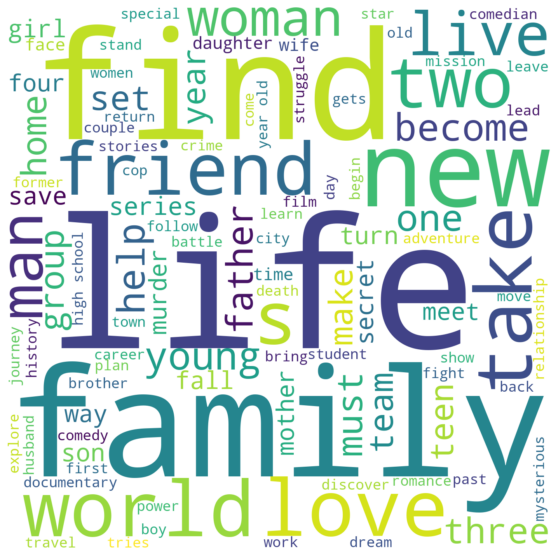

In [127]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


text = str(list(peliculas['description']))

wordcloud = WordCloud(background_color = 'white', width = 1400,  height = 1400, max_words = 100).generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## Referencias
 - varios